In [1]:
import sys
sys.path.insert(0, '/Users/sergiocamelo/Dropbox/Sergio-Joann/Code')
import VRPClass

import numpy as np
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist
import copy
from copy import deepcopy
import lower_bound
lower_bound = reload(lower_bound)

# We want to solve the Vehicle Routing Problem
# We first generate a random problem
k = 30
m = 1
n = 100

H = ['h_'+str(i) for i in range(k)]
M = ['m_'+str(i) for i in range(m)]
N = ['n_'+str(i) for i in range(n)]

H_p = np.random.rand(k,2)
M_p = np.random.rand(m,2)
N_p = np.random.rand(n,2)

quantities = {f: 1 for i,f in enumerate(N)}
capacities = {h:8 for i,h in enumerate(H)}
type_dist = 'euclid'

vrp = VRPClass.VRP(H, N, H_p, N_p, quantities, capacities, type_dist, M = M, M_p = M_p)
#vrp.draw_problem()


In [2]:
iterations_grad_m1 = 100
iterations_grad_m2 = 100
iterations_m2 = 1
z_ub = 30
Delta = 1000
Delta_zero = 1000
Delta_final = 1000
gamma = 5
gamma_zero = 5
gamma_final = 5
epsilon = 0.1
geo_distance = vrp.distance



max_val,u_opt,v_opt,lamb_opt, routes = lower_bound.construct_lower_bound_c(iterations_grad_m1,iterations_grad_m2,iterations_m2,z_ub,Delta,Delta_zero,Delta_final,gamma,gamma_zero,gamma_final,epsilon,H,capacities,N,quantities,geo_distance)

In [3]:
print(1)

1


In [49]:
print(2)

2


In [45]:
lower_bound.construct_lower_bound_c(iterations_grad_m1,iterations_grad_m2,0,z_ub,Delta,Delta_zero,Delta_final,gamma,gamma_zero,gamma_final,epsilon,H,capacities,N,quantities,geo_distance)

(7.32377758284021,
 [0.33055028556343846,
  0.17221693992144443,
  0.12706615653003037,
  0.16102729377440872,
  0.24761049066977592,
  0.13331130023203178,
  0.10776164928870663,
  0.19251280813500324,
  0.20003741957920193,
  0.10315241131068277,
  0.37031854990737606,
  0.11918021543280187,
  0.1920071617579127,
  0.24761049066977592,
  0.13495861344033647,
  0.13573521460040425,
  0.1851945143824815,
  0.1502993511015527,
  0.1318863708888764,
  0.11863777618860445,
  0.09069306409341092,
  0.11531973004280618,
  0.14877363433650706,
  0.16218889520447916,
  0.23980932394436852,
  0.21339496507533484,
  0.1826758131301541,
  0.2422951489531904,
  0.33055028556343846,
  0.19574663219977384,
  0.20003741957920193,
  0.11882234695817132,
  0.14987723778144593,
  0.17767930149611783,
  0.1809257136755406,
  0.1964306446631058,
  0.16463306612147327,
  0.21280193699850128,
  0.217452756109634,
  0.23006413963555788],
 [0.0,
  -8.213714713469297e-05,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  

In [4]:
reduced_routes = []
for r in routes:
    reduced_routes = reduced_routes + r

In [5]:
len(reduced_routes)

121511

In [6]:
truck_routes={}
farmer_routes={}
for i,route in enumerate(reduced_routes):
    if i%100 == 0:
        print(i)
    for farmer in route["path"]:
        if farmer<n:
            if not(farmer in farmer_routes.keys()):
                farmer_routes[farmer] = [i]
            else:
                farmer_routes[farmer] = farmer_routes[farmer] + [i]
    truck = route["truck"]
    if not(truck in truck_routes.keys()):
        truck_routes[truck] = [i]
    else:
        truck_routes[truck] = truck_routes[truck] + [i]
    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [7]:
from gurobipy import *
model = Model()
# Add variables to modes
variables = []
for i,route in enumerate(reduced_routes):
    variables.append(model.addVar(obj=route['geo_cost'], vtype=GRB.BINARY,
                                  name='route_'+str(i)))
model.update()
# Add farmer constraints
for farmer, routes in farmer_routes.iteritems():
    model.addConstr(quicksum([variables[k] for k in routes])>=1)
## Add route constraints
for farmer, routes in truck_routes.iteritems():
    model.addConstr(quicksum([variables[k] for k in routes])<=1)
model.update()

In [8]:
model

<gurobi.Model MIP instance Unnamed: 130 constrs, 121511 vars, Parameter changes: LogFile=gurobi.log>

In [9]:
model.optimize()

Optimize a model with 130 rows, 121511 columns and 945406 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [2e-01, 3e+00]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 1e+00]
Found heuristic solution: objective 38.286
Presolve removed 0 rows and 10719 columns
Presolve time: 1.19s
Presolved: 130 rows, 110792 columns, 879386 nonzeros
Variable types: 0 continuous, 110792 integer (110792 binary)

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity      0.0000000e+00      1s
       1        130   5.0000091e+07   9.3839032e+00      2s
       2        408   1.0000034e+07   1.0265518e+01      2s
       3        692   2.4464292e+01   1.2492586e+01      2s
       4       1036   2.0902796e+01   1.4389251e+01      2s
       5       1402   1.8725036e+01   1.5847074e+01      2s
       6       1726   1.8136894e+01   1.7316524e+01      2s
       7       19

In [10]:
max_val

18.11938369768717

In [25]:
routes_used = []
for v in model.getVars():
    name = v.VarName
    value = v.x
    if value == 1.0:
        routes_used.append(name)

In [26]:
routes_used = [reduced_routes[int(r.split("_")[1])] for r in routes_used]


In [29]:
# Check that the distance adds up
np.sum([r['geo_cost'] for r in routes_used])

19.0304677271619

In [39]:
sol = {}
for h in H:
    sol[h] = {"route":[]}
for r in routes_used:
    sol['h_'+str(r['truck']-n)] = {"route":['n_'+str(k) for k in r['path'][1:(len(r['path'])-1)]]}

In [40]:
vrp.total_distance(sol)

19.0304677271619

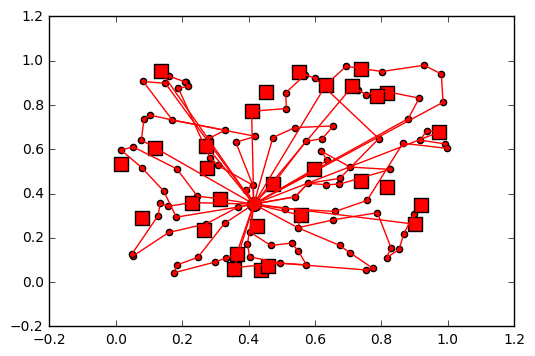

In [41]:
vrp.draw_solution(sol)

In [11]:
sol = vrp.heuristic(vrp.start_heuristic())

(680, 35.68789227419381)
(761, 34.65837855348482)
(762, 34.50390302297957)
(777, 34.00180727538805)
(907, 31.066476550090677)
(908, 31.035419790023695)
(909, 31.034068008474048)
(910, 30.973000093809862)
(911, 30.4324012463649)


In [57]:
vrp.LinearSolver(sol)

Optimize a model with 4860 rows, 73280 columns and 369500 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 6e+01]
  Objective range [1e-02, 2e+00]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 6e+01]
Presolve removed 0 rows and 20 columns
Presolve time: 0.53s
Presolved: 4860 rows, 73260 columns, 369480 nonzeros

Loaded MIP start with objective 19.4631

Variable types: 60 continuous, 73200 integer (73200 binary)

Root relaxation: objective 5.108312e+00, 3140 iterations, 1.11 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    5.10831    0  123   19.46314    5.10831  73.8%     -    2s
     0     0    5.78248    0  125   19.46314    5.78248  70.3%     -    6s
     0     0    5.78248    0  139   19.46314    5.78248  70.3%     -    7s
     0     0    5.78248    0  139   19.46314    5.78248  70.3%     -    7s
     0     0    5.78248    0  110   19

{'h_0': {'load': 9,
  'max_load': 10,
  'route': ['n_14',
   'n_15',
   'n_18',
   'n_41',
   'n_13',
   'n_17',
   'n_12',
   'n_16',
   'n_19'],
  'route_dist': 2.7130549149020213},
 'h_1': {'load': 0.0, 'max_load': 10, 'route': [], 'route_dist': 0.0},
 'h_10': {'load': 8,
  'max_load': 10,
  'route': ['n_21', 'n_26', 'n_22', 'n_20', 'n_29', 'n_27', 'n_28', 'n_23'],
  'route_dist': 2.9919749967669707},
 'h_11': {'load': 10,
  'max_load': 10,
  'route': ['n_52',
   'n_24',
   'n_5',
   'n_36',
   'n_0',
   'n_47',
   'n_33',
   'n_25',
   'n_10',
   'n_11'],
  'route_dist': 2.2731745156778604},
 'h_12': {'load': 0.0, 'max_load': 10, 'route': [], 'route_dist': 0.0},
 'h_13': {'load': 0.0, 'max_load': 10, 'route': [], 'route_dist': 0.0},
 'h_14': {'load': 0.0, 'max_load': 10, 'route': [], 'route_dist': 0.0},
 'h_15': {'load': 8,
  'max_load': 10,
  'route': ['n_1', 'n_6', 'n_4', 'n_8', 'n_44', 'n_3', 'n_7', 'n_2'],
  'route_dist': 3.107047843821351},
 'h_16': {'load': 0.0, 'max_load': 1

In [ ]:
sol = vrp.heuristic(sol)

In [2]:
## Compare both implementations and check their performance
import lower_bound

max_val,u_opt,v_opt,lamb_opt = lower_bound.optimize_lower_bound_c(50, 20, 0.1, H,capacities,N,quantities,vrp.distance)
lower_bound = reload(lower_bound)
max_val,u_opt,v_opt,lamb_opt = lower_bound.optimize_lower_bound(50, 20, 0.1, H,capacities,N,quantities,vrp.distance_dict)

ImportError: dlopen(./cpp_lower_bounds.so, 2): Symbol not found: __Z23optimize_lower_bound_M2idiidddNSt3__16vectorIiNS_9allocatorIiEEEES3_S3_S3_NS0_INS0_IdNS1_IdEEEENS1_IS5_EEEES5_S5_
  Referenced from: ./cpp_lower_bounds.so
  Expected in: dynamic lookup


In [29]:
lower_bound = reload(lower_bound)

sub_iterations = 100
z_ub = 20
Delta = 10
Delta_zero = 1000
gamma = 5
gamma_zero = 10
epsilon = 0.1
geo_distance = vrp.distance
mu = v_opt
lamb = lamb_opt
lower_bound.lower_bound_optimizer_M2_c(sub_iterations, z_ub, Delta, Delta_zero, gamma, gamma_zero, epsilon, H, capacities, N, quantities, geo_distance, mu, lamb)

(3.0106107285127157,
 [1.0754272195971388,
  0.25663588322678366,
  0.9303197337115752,
  0.412870420241133,
  0.9734131852210013],
 [-0.28436160844724045, -0.14911576509735092, -0.20457833994032454],
 [0.3248538015891052,
  -0.47470535555358995,
  0.1989784949312015,
  -0.30483485297329144,
  0.2557079120065769])

In [30]:
lower_bound = reload(lower_bound)
geo_distance = vrp.distance_dict

max_val,u_opt,v_opt,lamb_opt = lower_bound.lower_bound_optimizer_M2(sub_iterations, z_ub, Delta, Delta_zero, gamma, gamma_zero, epsilon, H, capacities, N, quantities, geo_distance, mu, lamb)

2.101848542886627
2.2318166716009404
2.386266751417496
1.741675907826158
2.483714829591995
2.394955367283793
2.229327165393166
new epsilon:0.066667
1.980237621985524
2.727492204788275
2.006959754635819
2.4530076745965834
2.8520095082347634
2.221778067191942
2.508261876575507
new epsilon:0.044444
2.6941078012001425
2.7777385343444663
2.327873688977979
2.8567185723541595
2.4960816642882677
2.9099190998453683
2.6510602504330665
new epsilon:0.029630
2.7321057225863594
2.7368850350982257
2.9343438466742198
2.329173041466465
2.7297465558224023
2.7729831652685584
2.8915645661657345
2.665776894592
new epsilon:0.019753
2.865594680097301
2.888488481146738
2.933328324127376
2.743185692278132
2.8677652570926555
2.941844926822931
2.877355147201609
new epsilon:0.013169
2.922369771506082
2.9247840309003466
2.9117937513535574
2.9867713571470427
2.7734787759344526
2.9181583111569207
2.9095840411606426
new epsilon:0.008779
2.991017518697481
2.9532914234592935
2.9720283059358437
2.9289692584435225
2.9901

In [37]:
reduced_distance = lower_bound.reduced_cost_dict_complete(u_opt, v_opt, geo_distance,N,H)
NewRoutes = {}
for h in H:
    NewRoutes[h] = lower_bound.GENROUTE(Delta_zero, gamma_zero, h, capacities[h], N, quantities, reduced_distance)


In [36]:
u_opt

{'n_0': 1.0754272195971388,
 'n_1': 0.2566358832267835,
 'n_2': 0.930319733711575,
 'n_3': 0.4128704202411331,
 'n_4': 0.9734131852210013}

In [38]:
NewRoutes

{'h_0': {'n_0': [{'cost': -1.580211605806691,
    'indices': (8, 0),
    'load': 4,
    'median': 'n_0',
    'path': ['h_0', 'n_1', 'n_0', 'n_4', 'n_2', 'h_0']},
   {'cost': -0.7519922553321128,
    'indices': (8, 1),
    'load': 3,
    'median': 'n_0',
    'path': ['h_0', 'n_1', 'n_0', 'n_2', 'h_0']},
   {'cost': -0.6516311614039927,
    'indices': (8, 4),
    'load': 3,
    'median': 'n_0',
    'path': ['h_0', 'n_1', 'n_0', 'n_4', 'h_0']},
   {'cost': -0.5102686193304414,
    'indices': (8, 9),
    'load': 4,
    'median': 'n_0',
    'path': ['h_0', 'n_1', 'n_0', 'n_2', 'n_3', 'h_0']},
   {'cost': 5.551115123125783e-17,
    'indices': (0, 7),
    'load': 1,
    'median': 'n_0',
    'path': ['h_0', 'n_0', 'h_0']},
   {'cost': 0.09496804273367113,
    'indices': (8, 7),
    'load': 2,
    'median': 'n_0',
    'path': ['h_0', 'n_1', 'n_0', 'h_0']},
   {'cost': 0.3244105754113584,
    'indices': (0, 10),
    'load': 2,
    'median': 'n_0',
    'path': ['h_0', 'n_0', 'n_3', 'h_0']},
   {'

In [19]:
vrp.LinearSolver()

Optimize a model with 49 rows, 98 columns and 448 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 5e+00]
  Objective range [1e-02, 2e+00]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 5e+00]
Found heuristic solution: objective 5.47148
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 49 rows, 95 columns, 445 nonzeros
Variable types: 5 continuous, 90 integer (90 binary)

Root relaxation: objective 1.435493e+00, 25 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.43549    0   11    5.47148    1.43549  73.8%     -    0s
H    0     0                       3.0442544    1.43549  52.8%     -    0s
     0     0    1.43549    0   13    3.04425    1.43549  52.8%     -    0s
     0     0    1.74699    0    6    3.04425    1.74699  42.6%     -    0s
     0     0    1.74699    0    6    3.04425    1.74699  42.6%

{'h_0': {'load': 0.0, 'max_load': 5, 'route': [], 'route_dist': 0.0},
 'h_1': {'load': 5,
  'max_load': 5,
  'route': ['n_4', 'n_1', 'n_0', 'n_3', 'n_2'],
  'route_dist': 2.3542156337551456},
 'h_2': {'load': 0.0, 'max_load': 5, 'route': [], 'route_dist': 0.0}}

In [22]:
sol = _

In [23]:
vrp.LinearSolver(_)

Optimize a model with 1065 rows, 4685 columns and 24545 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 3e+01]
  Objective range [9e-03, 2e+00]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 3e+01]
Presolve removed 0 rows and 5 columns
Presolve time: 0.03s
Presolved: 1065 rows, 4680 columns, 24540 nonzeros

Loaded MIP start with objective 7.57644

Variable types: 30 continuous, 4650 integer (4650 binary)

Root relaxation: objective 3.925063e+00, 348 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.92506    0   65    7.57644    3.92506  48.2%     -    0s
     0     0    4.18571    0   72    7.57644    4.18571  44.8%     -    0s
     0     0    4.24179    0   75    7.57644    4.24179  44.0%     -    0s
     0     0    4.24179    0   75    7.57644    4.24179  44.0%     -    0s
     0     0    4.24179    0   75    7.57644  

{'h_0': {'load': 10,
  'max_load': 10,
  'route': ['n_9',
   'n_1',
   'n_21',
   'n_14',
   'n_28',
   'n_8',
   'n_22',
   'n_20',
   'n_0',
   'n_24'],
  'route_dist': 2.7695074803692235},
 'h_1': {'load': 0.0, 'max_load': 10, 'route': [], 'route_dist': 0.0},
 'h_2': {'load': 0.0, 'max_load': 10, 'route': [], 'route_dist': 0.0},
 'h_3': {'load': 10,
  'max_load': 10,
  'route': ['n_15',
   'n_29',
   'n_11',
   'n_6',
   'n_23',
   'n_16',
   'n_7',
   'n_17',
   'n_5',
   'n_3'],
  'route_dist': 1.8854551346248822},
 'h_4': {'load': 10,
  'max_load': 10,
  'route': ['n_13',
   'n_12',
   'n_4',
   'n_25',
   'n_2',
   'n_19',
   'n_26',
   'n_10',
   'n_18',
   'n_27'],
  'route_dist': 2.921482341890589}}

In [161]:
from gurobipy import *
model = Model()
# Add variables to modes
variables = []
for i,route in enumerate(reduced_routes):
    variables.append(model.addVar(obj=route['geo_cost'], vtype=GRB.BINARY,
                                  name='route_'+str(i)))
model.update()
# Add farmer constraints
for farmer, routes in enumerate(farmer_routes):
    model.addConstr(quicksum([variables[k] for k in routes])>=1)
## Add route constraints
cumulated = 0
for i,cut in enumerate(cut_point):
    start = cumulated
    end = cumulated + cut
    model.addConstr(quicksum([variables[k] for k in range(start,end)])<=1)
    cumulated = end
model.update()

In [162]:
model.optimize()

Optimize a model with 50 rows, 74692 columns and 431587 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [2e-01, 3e+00]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 1e+00]
Presolve removed 0 rows and 24 columns
Presolve time: 1.20s
Presolved: 50 rows, 74668 columns, 431455 nonzeros
Variable types: 0 continuous, 74668 integer (74668 binary)

Starting sifting (using dual simplex for sub-problems)...

    Iter     Pivots    Primal Obj      Dual Obj        Time
       0          0     infinity      0.0000000e+00      4s
       1         63   1.9000036e+07   5.9012949e+00      4s
       2        185   1.0000139e+06   6.3124481e+00      4s
       3        300   1.4350558e+01   7.8778336e+00      4s
       4        432   1.2354014e+01   9.1294106e+00      4s
       5        553   1.1687850e+01   1.0641972e+01      4s
       6        641   1.1513592e+01   1.1507498e+01      4s

Sifting complete


Root relaxation: objective 1.151359e+01, 697 iter

In [163]:
sol_h = vrp.heuristic(vrp.start_heuristic())

In [ ]:
vrp.LinearSolver(sol_h)

Optimize a model with 2030 rows, 16450 columns and 83930 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 4e+01]
  Objective range [1e-02, 2e+00]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 4e+01]
Presolve removed 0 rows and 10 columns
Presolve time: 0.11s
Presolved: 2030 rows, 16440 columns, 83920 nonzeros

Loaded MIP start with objective 13.0276

Variable types: 40 continuous, 16400 integer (16400 binary)

Root relaxation: objective 3.674285e+00, 981 iterations, 0.12 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.67428    0   83   13.02762    3.67428  71.8%     -    0s
     0     0    3.85680    0  100   13.02762    3.85680  70.4%     -    0s
     0     0    4.67530    0   90   13.02762    4.67530  64.1%     -    1s
     0     0    4.67896    0   92   13.02762    4.67896  64.1%     -    1s
     0     0    4.67896    0   92   13.02